## Visualizing n random or representative cell in a given well
- Inputs are:
    -  **fileName** - .sql file path for the target plate(or a dataframe)
    -  **wellName** - Well name
    -  **n_cells** - number of single cells you want to visualize
    -  **boxSize** - size of box in pixels for cropping a cell
    -  **channels** - list of channels you want to plot
    -  **repEnabled** - Representative flag 
        - True if you want representative cells
        - False if you want random cells 

#### Steps:

- Reading the target well from the input plate 
- For random: randomly select n cells from the input data
- For representative: Cluster the data to (100 - you can change this number) and pick the cluster 
  which is most similar to mean cluster
- Visualize  
  

In [42]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# from utils import read_data, visualize_data
from utils.read_data import *
from utils.visualize_data import *
from sklearn.cluster import KMeans
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Inputs

In [47]:
fileName='/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/\
workspace/backend/2016_04_01_a549_48hr_batch1/SQ00015195/SQ00015195.sqlite'

n_cells=6

boxSize=160

wellName=["A10"]

repEnabled= True

channels=["Mito","AGP","DNA","RNA","ER"]

### Visualize

<IPython.core.display.Javascript object>


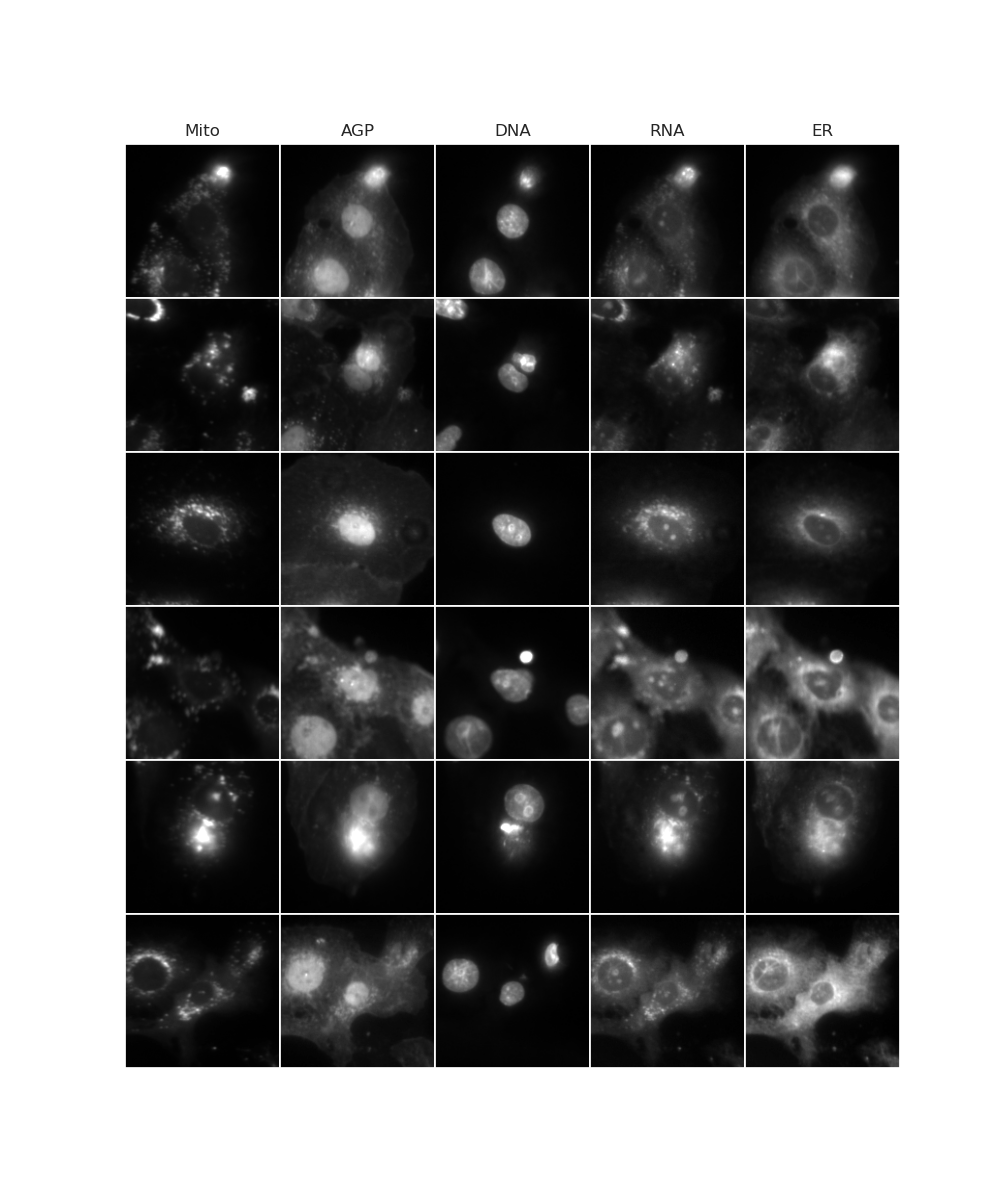

In [48]:
df_p_s0=readSingleCellData_sqlalch_well_subset(fileName,wellName);

df_p_s=df_p_s0.copy()

images_dir="/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/2016_04_01_a549_48hr_batch1_compressed/"

for ch in channels:
    df_p_s["PathName_Orig"+ch]=images_dir+"images/"+df_p_s["Image_Metadata_Plate"].astype(str)
    df_p_s["FileName_Orig"+ch]=df_p_s["Image_FileName_Orig"+ch].apply(lambda x: x.replace("tiff","png"))

cp_features=df_p_s.columns[df_p_s.columns.str.contains("Cells_|Cytoplasm_|Nuclei_")].tolist()


if repEnabled:
    kmeans = KMeans(n_clusters=20).fit(df_p_s[cp_features].values)
    clusterLabels=kmeans.labels_
    df_p_s['clusterLabels']=clusterLabels;
    mean_clus=kmeans.predict(df_p_s[cp_features].mean().values[np.newaxis,])
    df_p_s=df_p_s[df_p_s["clusterLabels"]==mean_clus[0]]

dff=df_p_s.reset_index(drop=True).sample(n = n_cells, replace = False).reset_index(drop=True)
visualize_n_SingleCell(channels,dff,boxSize);